<a href="https://colab.research.google.com/github/yeonghun00/stock-notes/blob/main/analysis/useful/news.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install newsapi-python
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [64]:
from newsapi import NewsApiClient
api_key = '6147ad35d10843b2949edc41cd955155'
api = NewsApiClient(api_key=api_key)

In [72]:
import pandas as pd

headlines = api.get_top_headlines(category='business', country='us', page_size=100)
headlines_df = pd.DataFrame(headlines['articles'])

In [73]:
headlines_df['publishedAt'] = pd.to_datetime(headlines_df['publishedAt'])
headlines_df.rename(columns={'publishedAt': 'date'}, inplace=True)
headlines_df['date'] = headlines_df['date'].dt.date

In [68]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
import re

In [74]:
analyzer = SentimentIntensityAnalyzer()

# Vader Polarity
headlines_df = pd.concat([headlines_df, pd.DataFrame([analyzer.polarity_scores(text) for text in headlines_df['title']])], axis=1)

# TextBlob Sebjectivity
headlines_df['subjectivity'] = [TextBlob(text).sentiment.subjectivity for text in headlines_df['title']]
headlines_df = headlines_df.fillna(0)

<ipython-input-75-dc148f5e7725>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  trend_df = headlines_df.groupby(by='date').mean()


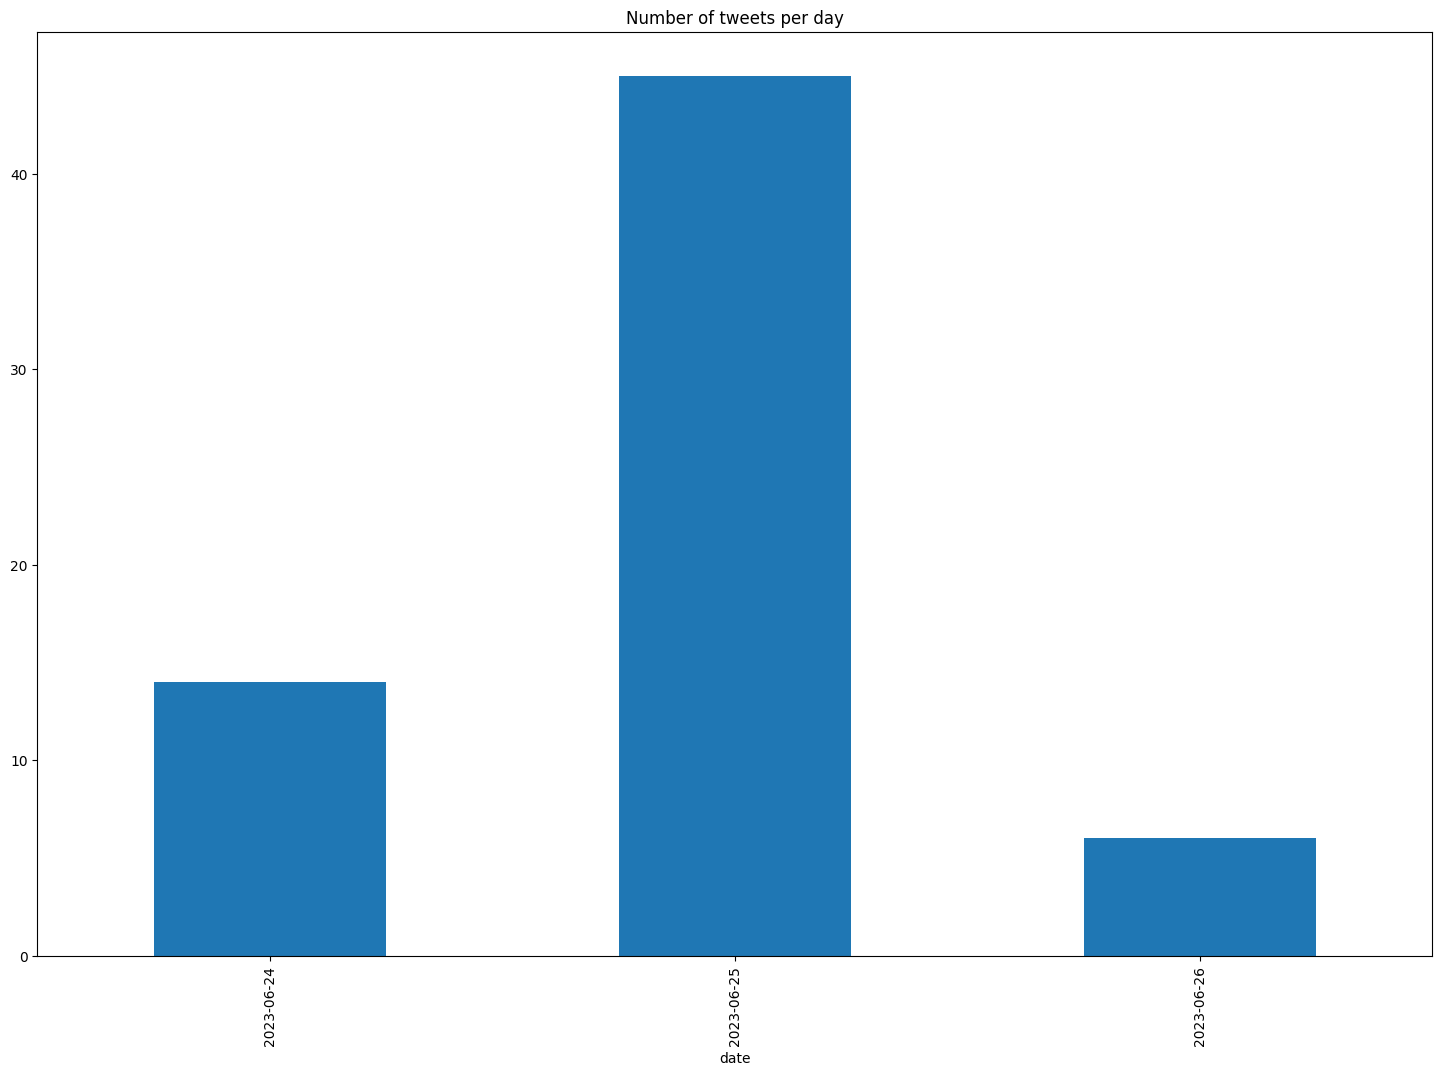

In [75]:
trend_df = headlines_df.groupby(by='date').mean()

from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt

headlines_df.groupby(by='date').count()['title'].plot(kind='bar', figsize=(18,12))
plt.title('Number of tweets per day')
plt.show()

In [63]:
headlines_df['publishedAt']

0     2023-06-26T04:02:00Z
1     2023-06-26T03:41:04Z
2     2023-06-26T01:50:48Z
3     2023-06-26T00:57:00Z
4     2023-06-26T00:49:00Z
              ...         
60    2023-06-24T15:51:36Z
61    2023-06-24T15:10:00Z
62    2023-06-24T12:30:00Z
63    2023-06-24T06:37:18Z
64    2023-06-24T05:37:00Z
Name: publishedAt, Length: 65, dtype: object

In [10]:
api.get_everything(q='nasdaq')


{'status': 'ok',
 'totalResults': 17646,
 'articles': [{'source': {'id': 'google-news', 'name': 'Google News'},
   'author': None,
   'title': 'Yandex granted Nasdaq lifeline subject to Russia restructuring - Reuters',
   'description': 'Yandex granted Nasdaq lifeline subject to Russia restructuring\xa0\xa0Reuters',
   'url': 'https://consent.google.com/ml?continue=https://news.google.com/rss/articles/CBMidmh0dHBzOi8vd3d3LnJldXRlcnMuY29tL2J1c2luZXNzL21lZGlhLXRlbGVjb20veWFuZGV4LWdyYW50ZWQtbmFzZGFxLWxpZmVsaW5lLXN1YmplY3QtcnVzc2lhLXJlc3RydWN0dXJpbmctMjAyMy0wNi0wOC_SAQA?oc%3D5&gl=FR&hl=en-US&cm=2&pc=n&src=1',
   'urlToImage': None,
   'publishedAt': '2023-06-08T08:30:00Z',
   'content': 'We use cookies and data to<ul><li>Deliver and maintain Google services</li><li>Track outages and protect against spam, fraud, and abuse</li><li>Measure audience engagement and site statistics to unde… [+1131 chars]'},
  {'source': {'id': 'google-news', 'name': 'Google News'},
   'author': None,
   'title':